# PCA and Eigenface

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


data = np.loadtxt('faces.dat')

print("Dataset Loaded!")
print(data.shape)

Dataset Loaded!
(400, 4096)


(a) In this section I will display the 100th image.

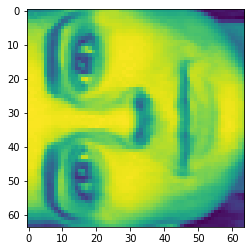

In [3]:
image = data[99].reshape((64,64))
imgplot = plt.imshow(image)

(b) I removed the mean of images and then I again display the 100th image.

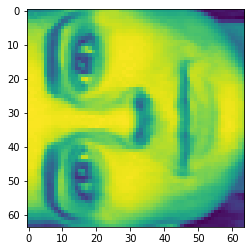

In [4]:
mean = data.mean(axis=1)
data = data - mean[:, np.newaxis]
image = data[99].reshape((64,64))
imgplot = plt.imshow(image)

(c) PCA is performed on mean-centered data matrix.

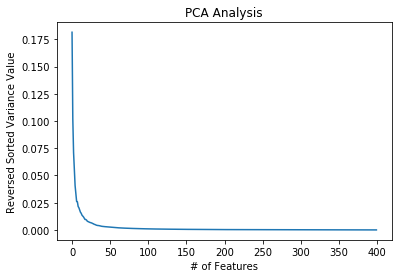

In [5]:
from sklearn.decomposition import PCA

covar_matrix = PCA(n_components = 400)
covar_matrix.fit(data)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

sorted_array = np.sort(variance)[::-1]

plt.ylabel('Reversed Sorted Variance Value')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')


plt.plot(sorted_array)

(d) The last eigenvalue is minimum because the 400th feature contains no more valuable information for PCA. Meaning no variance is captured by this feature.<br>
(e) In order to answer to this question, I will print the variance in the descending order. As you can see, after feature 34 the variance does not drop significantly anymore, which means the first 34 features contain most of the variance. So the “big” drop occurs in the eigenvalues at 34th feature point, that suggests a good dimension cutoff.

In [0]:
print(sorted_array[:100])
print("------------------------------------------------------")
for i in range(1, sorted_array.shape[0]):
  if abs(sorted_array[i] - sorted_array[i-1]) <= 0.00005:
    print("Index {} is where values stop increasing".format(i-1))
    break



[0.23812729 0.13993971 0.07968614 0.04998331 0.03609848 0.03156939
 0.02426832 0.02036398 0.01958114 0.01672122 0.01595222 0.01436979
 0.01246741 0.01147133 0.01062877 0.0097772  0.0091906  0.00815573
 0.00753875 0.00746985 0.00698578 0.00614628 0.00583928 0.00569723
 0.00546191 0.00531855 0.00513816 0.00495841 0.00457664 0.00441183
 0.00402002 0.0038419  0.00361951 0.00334542 0.00320381 0.00316041
 0.00305147 0.00298635 0.00282141 0.00274006 0.00259772 0.0025399
 0.00244547 0.0023984  0.0023089  0.00226419 0.00222286 0.00220443
 0.00208921 0.00204983 0.00196843 0.00191436 0.00185046 0.00178939
 0.00177608 0.00172483 0.00168585 0.00164168 0.00161885 0.00158394
 0.00155428 0.00152233 0.00149957 0.00147712 0.00142609 0.00140598
 0.00136941 0.00133973 0.00130915 0.0012872  0.00127428 0.00126232
 0.00123801 0.00121334 0.00117883 0.00114881 0.00114184 0.00110184
 0.00109686 0.00108623 0.00106535 0.00104696 0.00101681 0.00098781
 0.00097482 0.0009637  0.00095599 0.0009331  0.00091188 0.00090

(f) Then I will display the top-5 leading eigenvectors in 5 figures.

Components:
  (400, 4096)


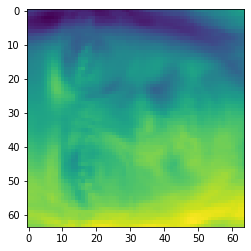

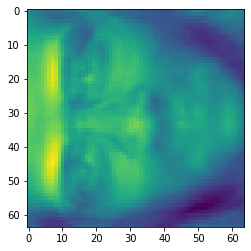

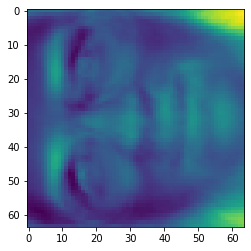

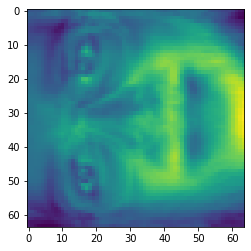

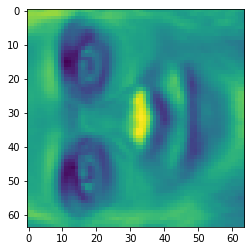

In [6]:
print('Components:\n ', covar_matrix.components_.shape)

# plot data - sklearn orders the components
for i in range(5):
  vector =covar_matrix.components_[i,:]
  component = vector.reshape((64,64))
  imgplot = plt.imshow(component)
  plt.show()




(g) Lastly, I reconstructed the 100th image with 10, 100, 200, and 399 principal components.

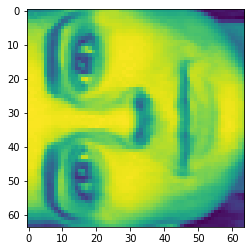

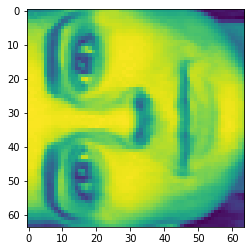

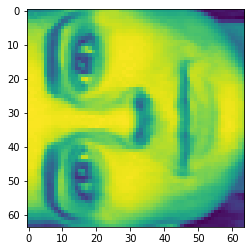

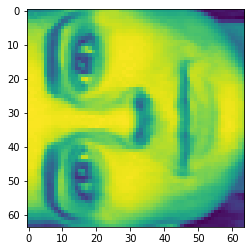

In [7]:
components = [9,99,199,398]
for idx in components:
  comp = covar_matrix.components_[idx,:].reshape((1,4096))
  image = data[99].reshape((1,4096))
  reconstructed = np.dot(comp,np.dot(comp.T, image))
  image = reconstructed.reshape((64,64))
  imgplot = plt.imshow(image)
  plt.show()
